<a href="https://colab.research.google.com/github/sothearith-min/Personal-EDA-project-/blob/main/Bank_Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%html
<link href='https://fonts.googleapis.com/css?family=Roboto+Mono' rel='stylesheet'>
<style>
    body {
        font-family: 'Roboto Mono', monospace;
        font-size: 12pt;
    }
</style>



# ***Bank Customer Churn Dataset***

## ***Objective***

  

*   To discover the bank customer dataset which I downloaded from : https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset 
*   Find the appropriate Machine Learning algorithm that can be used to predict if a customer is going to churn or not by using LazyPredict

## ***Importing Some Basic libraries and modules***

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns

## ***Loading Dataset***

In [7]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

## ***Basic Information of the Dataset***

In [8]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean      ┃ sd     ┃ p0       ┃ p25      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ customer_id        │   0 │     0 │  16000000 │  72000 │ 16000000 │ 16000000 │ 16000000 │ 16000000 │ ██████ │  │
│ │ credit_score       │   0 │     0 │       650 │     97 │      350 │      580 │      720 │      850 │  ▂▅█▆▃ │  │
│ │ age                │   0 │     0 │        39 │     10 │       18 │       32 │       44 │       92 │  ▃█▃▁  │  │
│ │ tenure             │   0 │     0 │         5 │    2.9 │        0 │        3 │        7 │       10 │ ▆█▄██▆ │  │
│ │ balance            │   0 │     0 │     76000 │  62000 │        0 │        0 │   130000 │   250000 │ █▂▆▅▁  │  │
│ │ products_number    │   0 │     0 │       1.5 │   0.58 │        1 │        1 │        2 │        4 │  █ ▇   │  │
│ │ credit_card        │   0 │     0 │      0.71 │   0.46 │        0 │        0 │        1 │        1 │ ▃    █ │  │
│ │ active_member      │   0 │     0 │      0.52 │    0.5 │        0 │        0 │        1 │        1 │ █    █ │  │
│ │ estimated_salary   │   0 │     0 │    100000 │  58000 │       12 │    51000 │   150000 │   200000 │ ██████ │  │
│ │ churn              │   0 │     0 │       0.2 │    0.4 │        0 │        0 │        0 │        1 │ █    ▂ │  │
│ └────────────────────┴─────┴───────┴───────────┴────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ country                   │       0 │          0 │                            1 │                    10000 │  │
│ │ gender                    │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

  From table above, the dataset contains 10000 rows and 12 columns.
  
  The data is clean, so we do not need the cleansing part here. So, we will jump through to the EDA part.

## ***EDA***

**Drop *Customer_ID* column from the data frame**

In [10]:
df = df.drop(['customer_id'],axis=1)

In [11]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Number of Males and Females**

In [12]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

**Number of Customer by *country***

In [13]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

There are only three unique countries where customers come from, and most of them come from France.

**Number of *churns* and *No_churns*** 

In [14]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

**Number of *products_number*,*credit_card* and *active_member*** 

In [15]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [16]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [17]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

**Plot Number of Churn by Country, Gender, Credit Score, Age, Tenure, Balance,Estimated Salary, Product Number,Credit Card and Active Member**

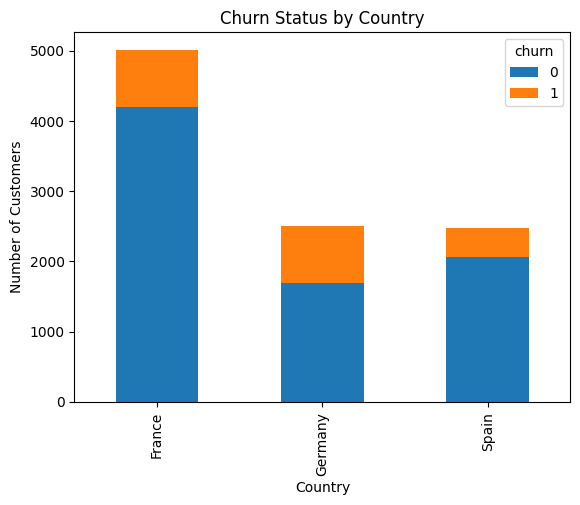

In [18]:
grouped = df.groupby(['country', 'churn']).size().reset_index(name='count')
pivot = grouped.pivot(index='country', columns='churn', values='count')
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Churn Status by Country')
plt.show()

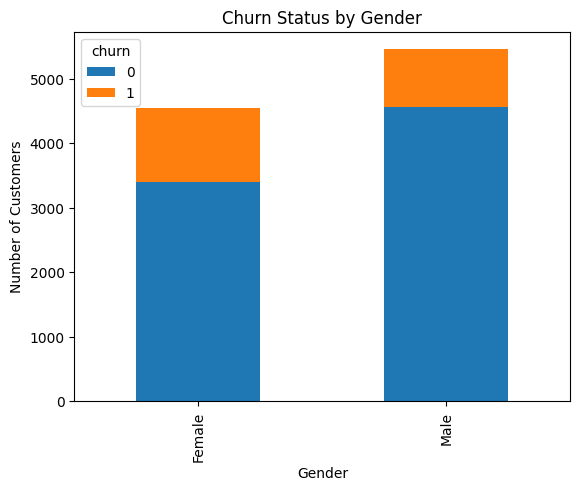

In [19]:
grouped = df.groupby(['gender', 'churn']).size().reset_index(name='count')
pivot = grouped.pivot(index='gender', columns='churn', values='count')
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Churn Status by Gender')
plt.show()

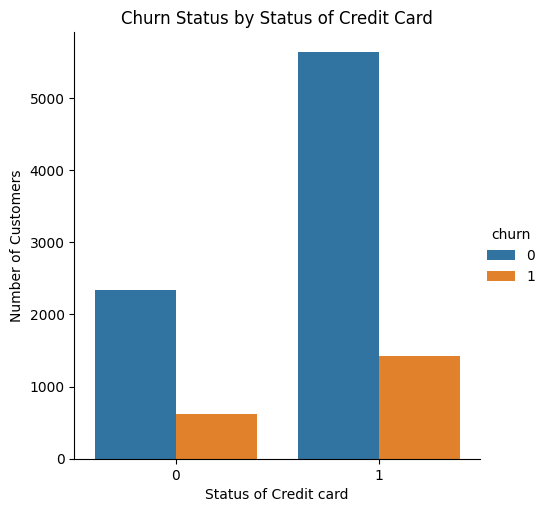

In [22]:
grouped = df.groupby(['credit_card', 'churn']).size().reset_index(name='count')
g = sns.catplot(x='credit_card', y='count', hue='churn', data=grouped, kind='bar')
g.set_ylabels("Number of Customers")
g.set_xlabels("Status of Credit card")

plt.title('Churn Status by Status of Credit Card')
plt.show()

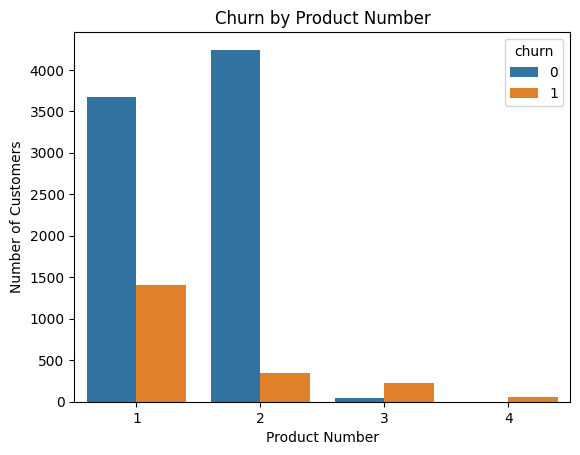

In [23]:
sns.countplot(x='products_number', hue='churn', data=df)
plt.xlabel('Product Number')
plt.ylabel('Number of Customers')
plt.title('Churn by Product Number')
plt.show()

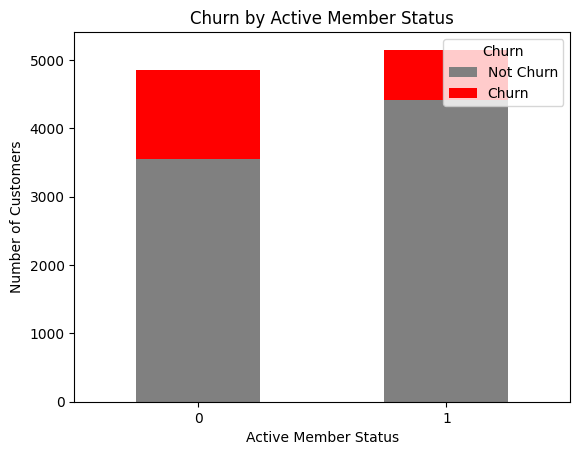

In [24]:
grouped = df.groupby(['active_member', 'churn']).size().reset_index(name='count')
pivot = grouped.pivot(index='active_member', columns='churn', values='count')
ax = pivot.plot(kind='bar', stacked=True, color=['gray', 'red'])
plt.title('Churn by Active Member Status')
plt.xticks(rotation=0)
plt.xlabel('Active Member Status')
plt.ylabel('Number of Customers')
ax.legend(['Not Churn', 'Churn'], title="Churn", loc='upper right')
plt.show()

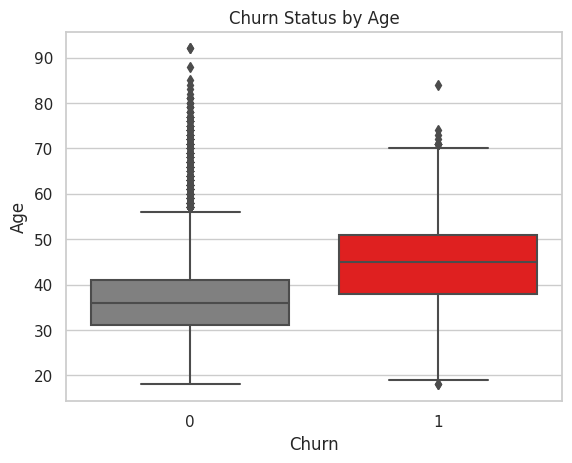

In [90]:
sns.boxplot(x='churn', y='age', data=df, palette=["gray", "red"])
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Churn Status by Age')
plt.show()

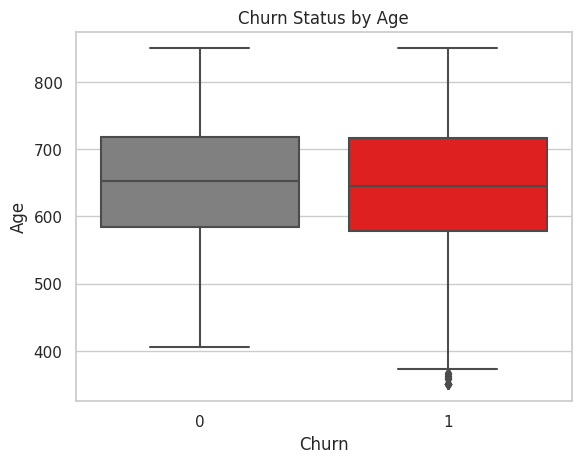

In [91]:
sns.boxplot(x='churn', y='credit_score', data=df, palette=["gray", "red"])
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.title('Churn Status by Credit Score')
plt.show()

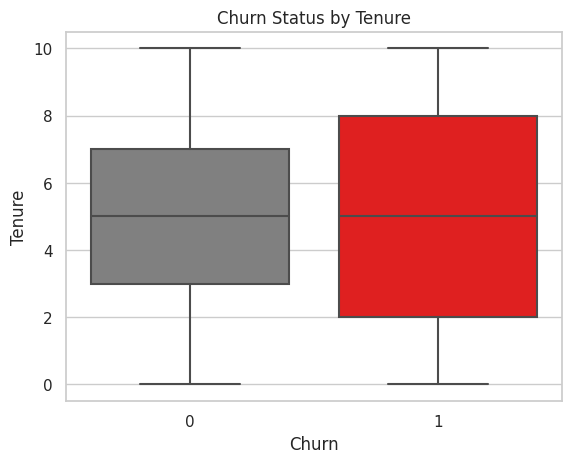

In [93]:
sns.boxplot(x='churn', y='tenure', data=df, palette=["gray", "red"])
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Churn Status by Tenure')
plt.show()

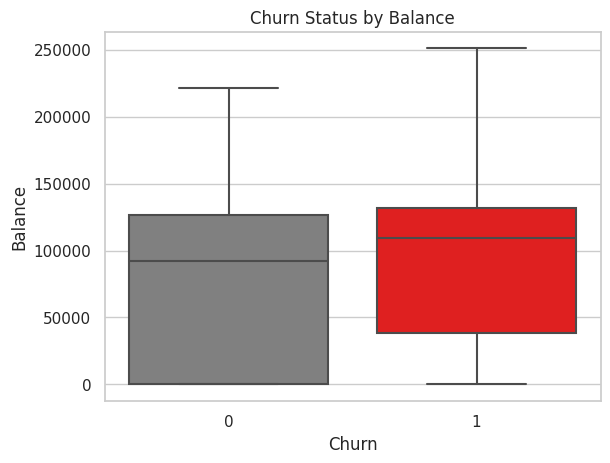

In [95]:
sns.boxplot(x='churn', y='balance', data=df, palette=["gray", "red"])
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Churn Status by Balance')
plt.show()

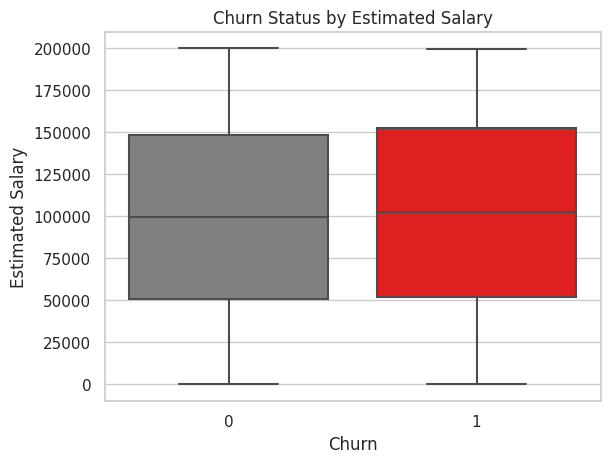

In [96]:
sns.boxplot(x='churn', y='estimated_salary', data=df, palette=["gray", "red"])
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.title('Churn Status by Estimated Salary')
plt.show()

**Histograms of numerical columns**

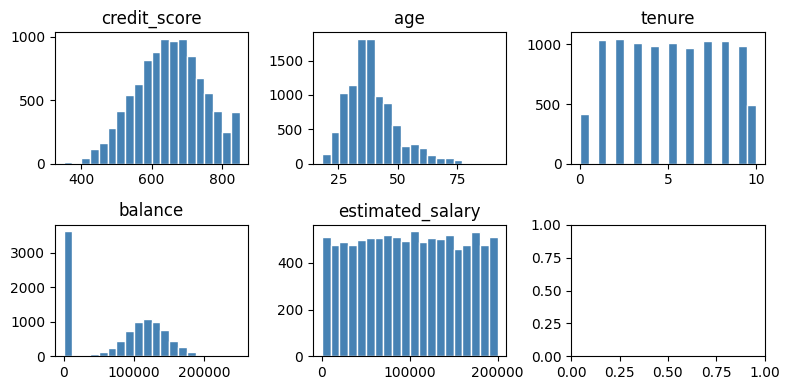

In [57]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
num_data = df[num_cols]
fig, axs = plt.subplots( 2,3,figsize=(8, 4))
for i, ax in enumerate(axs.flatten()):
    if i < len(num_cols):
        col = num_cols[i]
        ax.hist(num_data[col], bins=20, color='steelblue', edgecolor='white')
        ax.set_title(col)
plt.tight_layout()
plt.show()

**Check the relationship between variables**

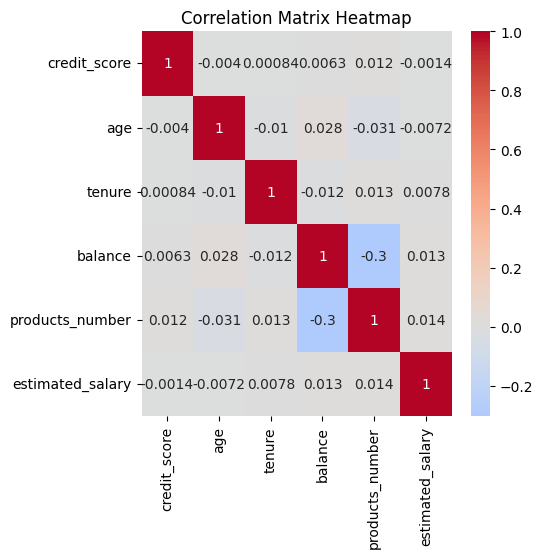

In [51]:
import seaborn as sns
# Compute correlation matrix
corr = num_data.corr()

# Create heatmap plot
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix Heatmap')
plt.show()

## ***Data Preparation for Modelling***

**Encoding Gender and Country to numerical variables**

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])

**Splitting data into two parts, training and testing**

In [26]:
X = df.copy()
X.drop('churn', axis = 1, inplace=True) 
y = df['churn']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Scaling the data**

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***Modelling***

Using LazyClassifire from LazyPredict, it will display some machine learning algorithms.

In [34]:
from lazypredict.Supervised import LazyClassifier

In [35]:
classifier = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = classifier.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.74,0.74,0.86,1.07
XGBClassifier,0.85,0.72,0.72,0.85,4.02
AdaBoostClassifier,0.85,0.71,0.71,0.84,0.47
RandomForestClassifier,0.86,0.70,0.70,0.84,1.37
ExtraTreesClassifier,0.86,0.70,0.70,0.84,1.32
BaggingClassifier,0.85,0.70,0.70,0.84,0.34
SVC,0.86,0.69,0.69,0.84,2.39
DecisionTreeClassifier,0.80,0.69,0.69,0.80,0.09
NearestCentroid,0.70,0.67,0.67,0.73,0.03


**Models Evaluation**

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [46]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Accuracy", "Balanced Accuracy", "ROC AUC", "F1 Score"),
                    vertical_spacing=0.4)
fig.add_trace(go.Scatter(x=models.index, y=models.Accuracy, mode="lines+markers", name="Accuracy", line=dict(color="red")), row=1, col=1)
fig.add_trace(go.Scatter(x=models.index, y=models['Balanced Accuracy'], mode="lines+markers", name="Balanced Accuracy", line=dict(color="blue")), row=1, col=2)
fig.add_trace(go.Scatter(x=models.index, y=models['ROC AUC'], mode="lines+markers", name="ROC AUC", line=dict(color="green")), row=2, col=1)
fig.add_trace(go.Scatter(x=models.index, y=models['F1 Score'], mode="lines+markers", name="F1 Score", line=dict(color="purple")), row=2, col=2)

fig.update_layout(height=800, width=800, title_text="Model Evaluation Metrics")
fig.show()

We can see that the LGBMClassifier has the highest scores in all four metrics, which indicates that it is the best performing model for predicting customer churn on this dataset. 